<a href="https://colab.research.google.com/github/Tasneem1312/22BDS0402-EDA-Project/blob/main/22BDS0402_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Setup & Loading Data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/recid.csv"
df = pd.read_csv(url)

# Display first few rows
df.head()


,rownames,black,alcohol,drugs,super,married,felon,workprg,property,person,priors,educ,rules,age,tserved,follow,durat,cens,ldurat
0,1,0,1,0,1,1,0,1,0,0,0,7,2,441,30,72,72,1,4.276666
1,2,1,0,0,1,0,1,1,1,0,0,12,0,307,19,75,75,1,4.317488
2,3,0,0,0,0,0,0,1,1,0,0,9,5,262,27,81,9,0,2.197225
3,4,0,0,1,1,0,1,1,1,0,2,9,3,253,38,76,25,0,3.218876
4,5,0,0,1,1,0,0,0,0,0,0,9,0,244,4,81,81,1,4.394449


2. Dataset Dimensions

In [3]:
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])


Number of rows: 1445
Number of columns: 19


3. Summary Statistics

In [4]:
df.describe(include='all')


,rownames,black,alcohol,drugs,super,married,felon,workprg,property,person,priors,educ,rules,age,tserved,follow,durat,cens,ldurat
count,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,723.000000,0.485121,0.209689,0.241522,0.694118,0.255363,0.314187,0.465052,0.254671,0.053287,1.431834,9.702422,1.185467,345.435986,19.182007,74.885813,55.372318,0.617993,3.745150
std,417.279882,0.499952,0.407227,0.428154,0.460940,0.436216,0.464352,0.498950,0.435827,0.224683,2.850443,2.441567,2.295409,121.050536,20.963778,3.500510,27.297830,0.486046,0.925045
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,198.000000,0.000000,70.000000,1.000000,0.000000,0.000000
25%,362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,258.000000,6.000000,72.000000,27.000000,0.000000,3.295837
50%,723.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,307.000000,12.000000,74.000000,71.000000,1.000000,4.262680
75%,1084.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,11.000000,1.000000,395.000000,25.000000,78.000000,76.000000,1.000000,4.330733
max,1445.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.000000,19.000000,27.000000,933.000000,219.000000,81.000000,81.000000,1.000000,4.394449


4. Data Handling
  - Checking datatypes and nulls

In [5]:
df.info()
print('Missing values per column:\n', df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  1445 non-null   int64  
 1   black     1445 non-null   int64  
 2   alcohol   1445 non-null   int64  
 3   drugs     1445 non-null   int64  
 4   super     1445 non-null   int64  
 5   married   1445 non-null   int64  
 6   felon     1445 non-null   int64  
 7   workprg   1445 non-null   int64  
 8   property  1445 non-null   int64  
 9   person    1445 non-null   int64  
 10  priors    1445 non-null   int64  
 11  educ      1445 non-null   int64  
 12  rules     1445 non-null   int64  
 13  age       1445 non-null   int64  
 14  tserved   1445 non-null   int64  
 15  follow    1445 non-null   int64  
 16  durat     1445 non-null   int64  
 17  cens      1445 non-null   int64  
 18  ldurat    1445 non-null   float64
dtypes: float64(1), int64(18)
memory usage: 214.6 KB
Missing values per co

In [6]:
# Example: If certain columns should be categorical
categorical_cols = ['black', 'alcohol', 'drugs', 'super', 'married', 'felon', 'workprg', 'property', 'person', 'cens']
for col in categorical_cols:
    df[col] = df[col].astype('category')


5. Data Cleaning
 - Handle missing values

In [7]:
df_clean = df.dropna()

 - Detect and handle duplicates

In [8]:
print('Duplicate rows:', df.duplicated().sum())
df_clean = df_clean.drop_duplicates()


Duplicate rows: 0


6. Univariate Analysis

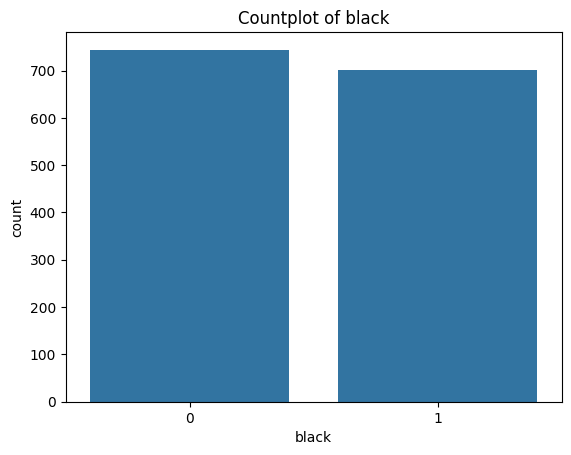

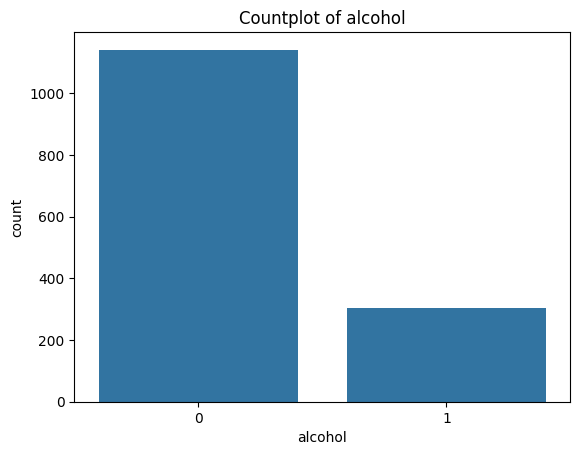

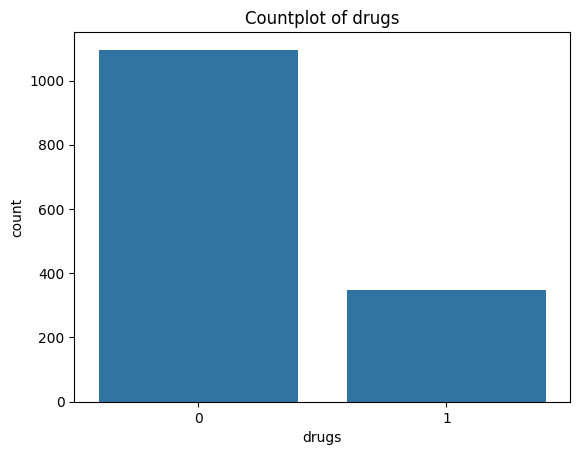

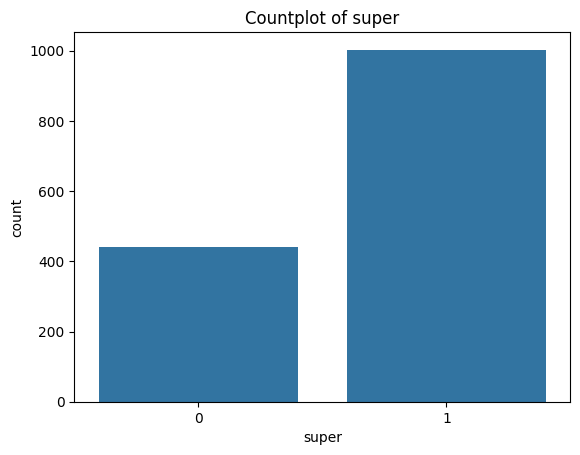

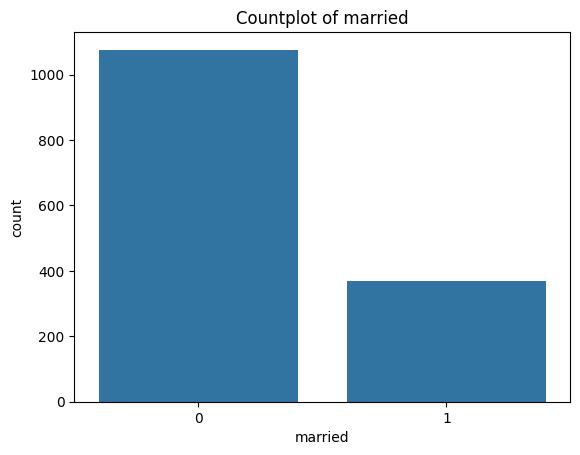

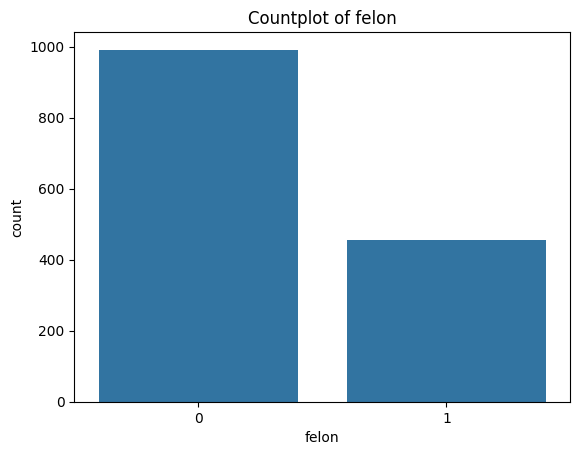

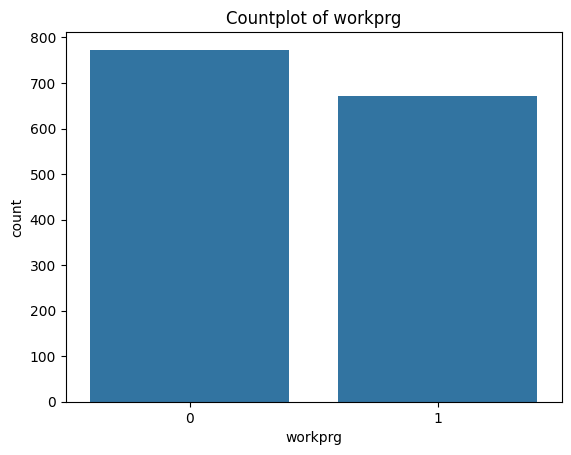

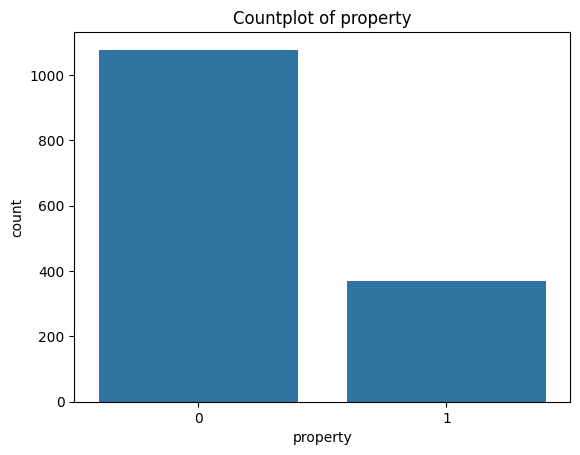

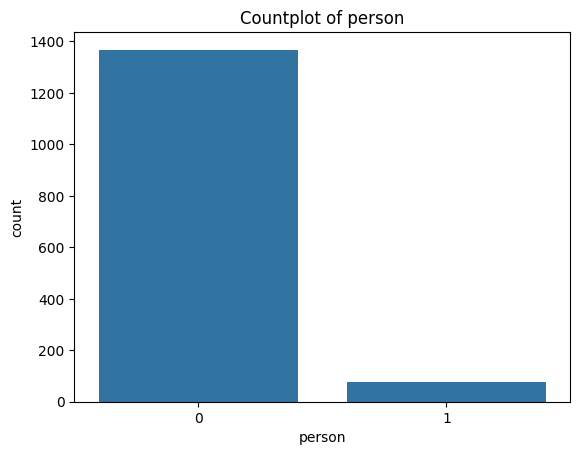

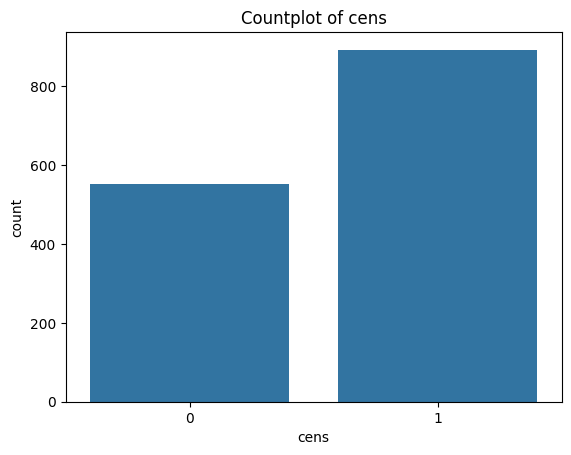

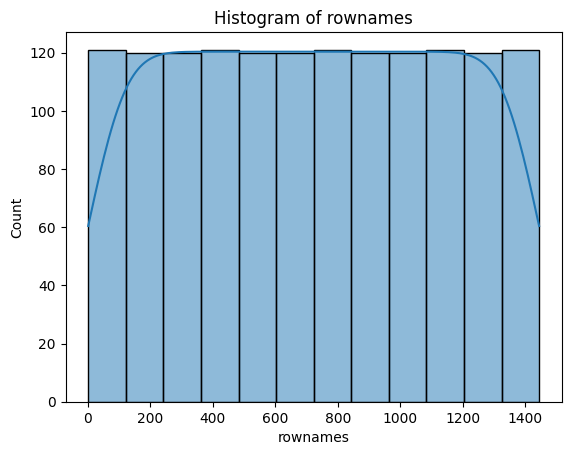

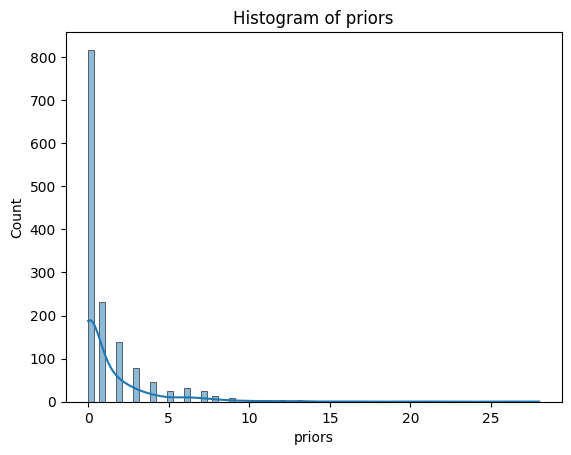

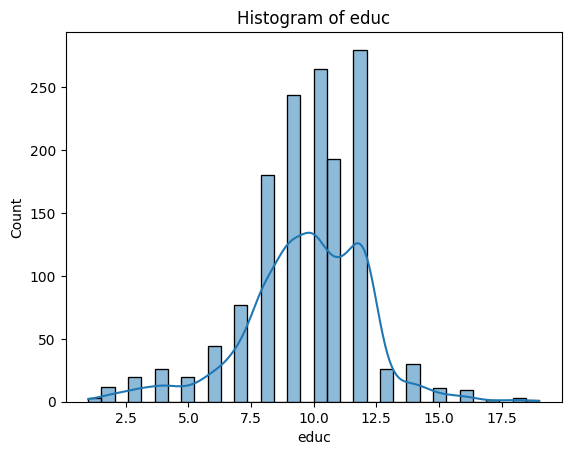

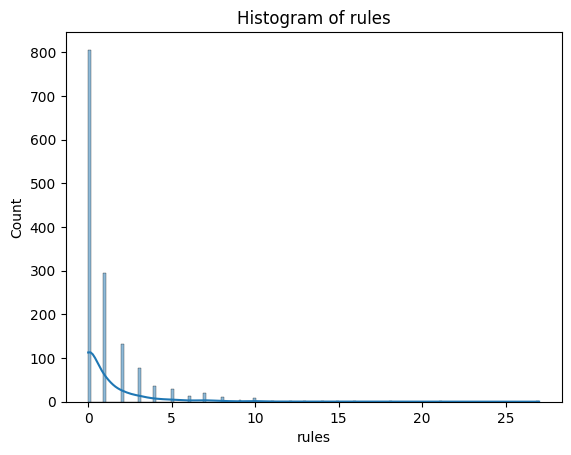

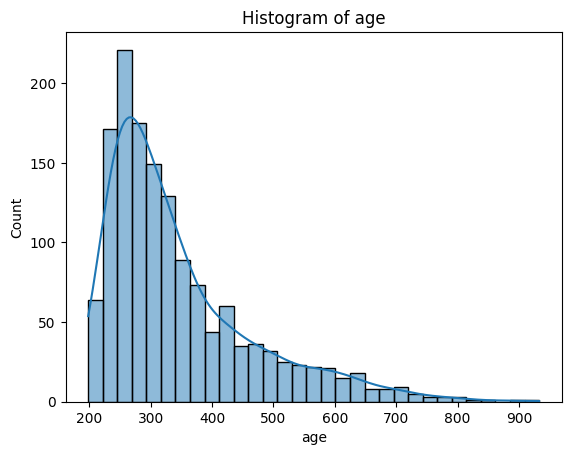

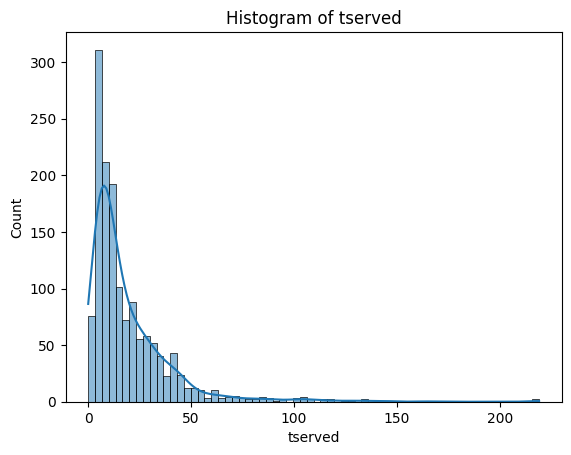

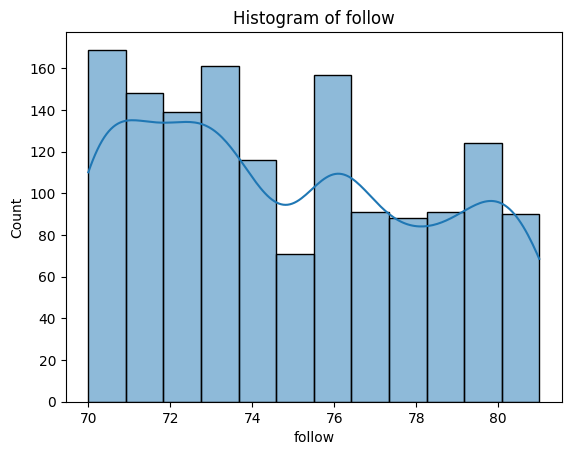

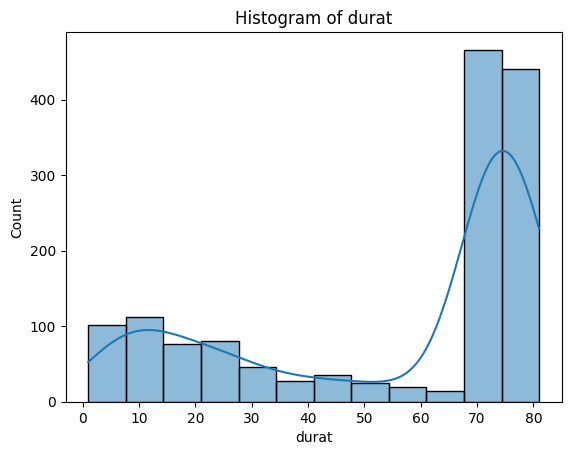

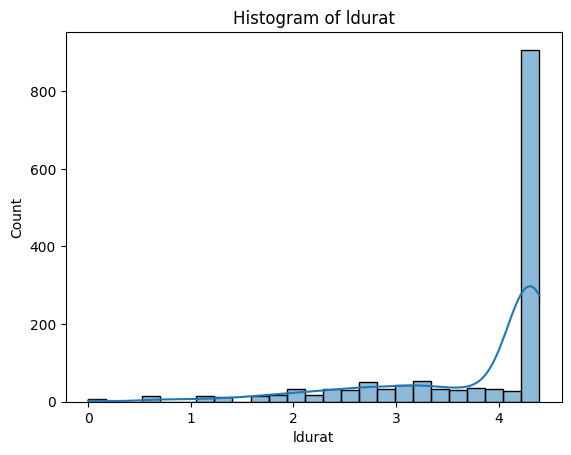

In [9]:
# For categorical columns
for col in categorical_cols:
    sns.countplot(x=col, data=df_clean)
    plt.title(f'Countplot of {col}')
    plt.show()

# For numerical columns
num_cols = df_clean.select_dtypes(include=np.number).columns
for col in num_cols:
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()


7. Bivariate Analysis

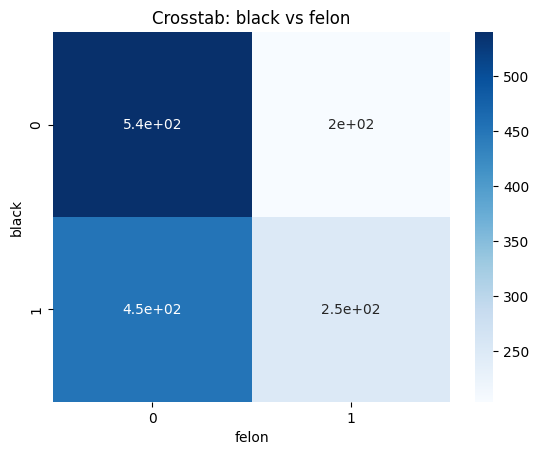

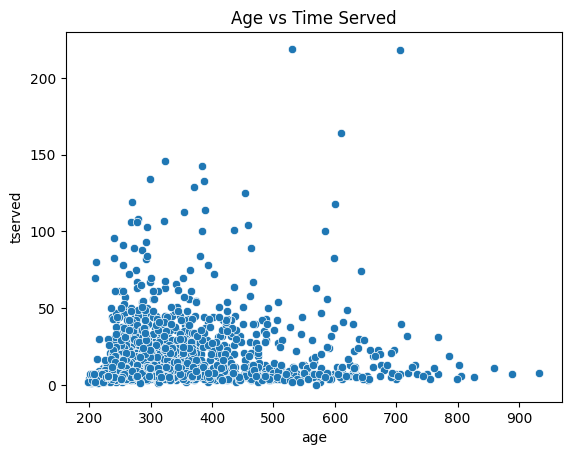

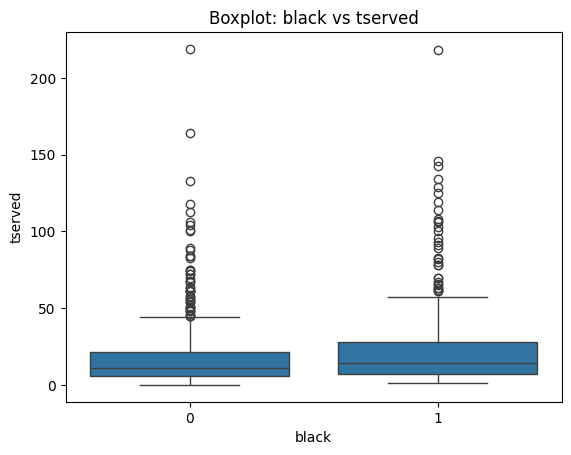

In [10]:
# Categorical vs Categorical: Crosstab & heatmap
pd.crosstab(df_clean['black'], df_clean['felon'])
sns.heatmap(pd.crosstab(df_clean['black'], df_clean['felon']), annot=True, cmap='Blues')
plt.title('Crosstab: black vs felon')
plt.show()

# Numerical vs Numerical: Scatter plots
sns.scatterplot(data=df_clean, x='age', y='tserved')
plt.title('Age vs Time Served')
plt.show()

# Categorical vs Numerical: Boxplots
sns.boxplot(x='black', y='tserved', data=df_clean)
plt.title('Boxplot: black vs tserved')
plt.show()


8. Multivariate Analysis

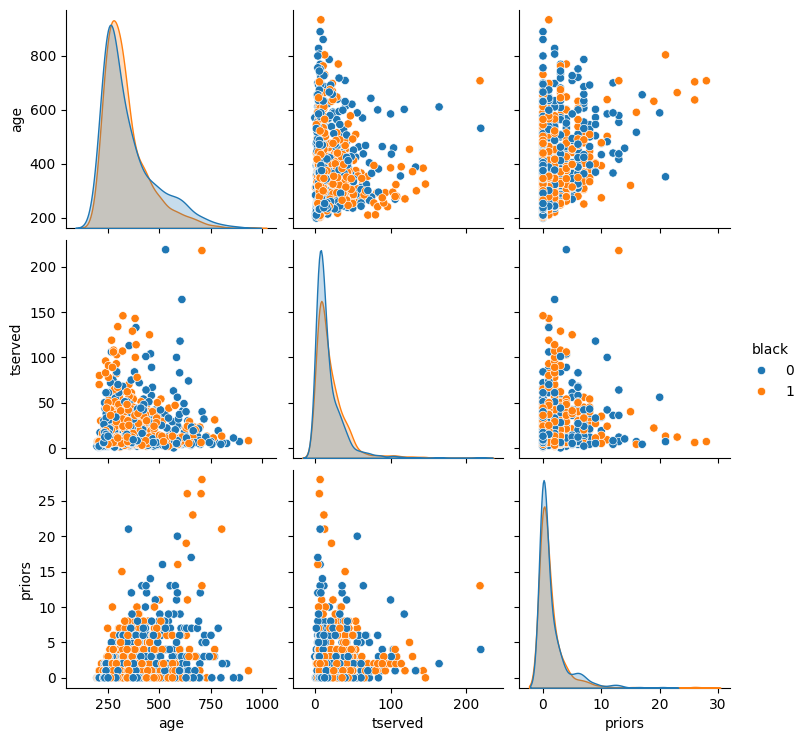

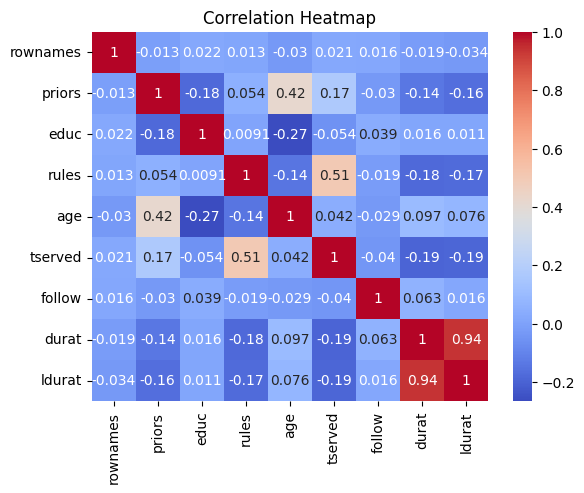

In [11]:
# Pairplot for a subset of columns
sns.pairplot(df_clean[['age', 'tserved', 'priors', 'black', 'felon']], hue='black')
plt.show()

# Heatmap for correlation
corr = df_clean.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Phase 2 BCSE331L Exploratory Data Analysis

1)1D Analysis

a. Skewness per Numerical Column

In [12]:
print(df.skew(numeric_only=True))


rownames    0.000000
priors      3.994957
educ       -0.532744
rules       4.101125
age         1.489061
tserved     3.411942
follow      0.231751
durat      -0.819114
ldurat     -1.652826
dtype: float64


b. Quantiles

In [13]:
# Quantiles for numerical columns
print(df.quantile([0.25, 0.5, 0.75], numeric_only=True))

      rownames  priors  educ  rules    age  tserved  follow  durat    ldurat
0.25     362.0     0.0   8.0    0.0  258.0      6.0    72.0   27.0  3.295837
0.50     723.0     0.0  10.0    0.0  307.0     12.0    74.0   71.0  4.262680
0.75    1084.0     2.0  11.0    1.0  395.0     25.0    78.0   76.0  4.330733


c. Frequency Distributions

In [15]:
# For all categorical columns
categorical_cols = df.select_dtypes(include='category').columns
for col in categorical_cols:
    print(col)
    print(df[col].value_counts())

black
black
0    744
1    701
Name: count, dtype: int64
alcohol
alcohol
0    1142
1     303
Name: count, dtype: int64
drugs
drugs
0    1096
1     349
Name: count, dtype: int64
super
super
1    1003
0     442
Name: count, dtype: int64
married
married
0    1076
1     369
Name: count, dtype: int64
felon
felon
0    991
1    454
Name: count, dtype: int64
workprg
workprg
0    773
1    672
Name: count, dtype: int64
property
property
0    1077
1     368
Name: count, dtype: int64
person
person
0    1368
1      77
Name: count, dtype: int64
cens
cens
1    893
0    552
Name: count, dtype: int64


d. Categorical Variable Analysis

Proportion plots:

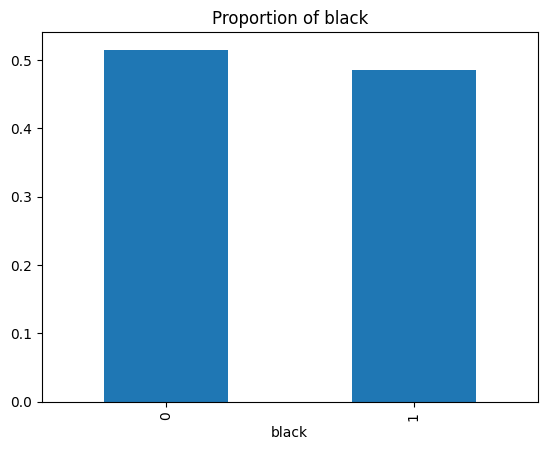

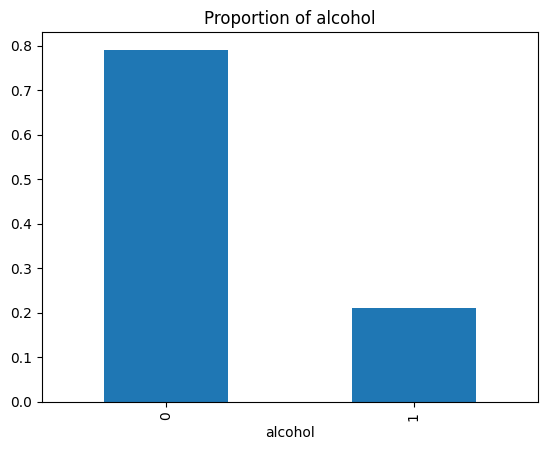

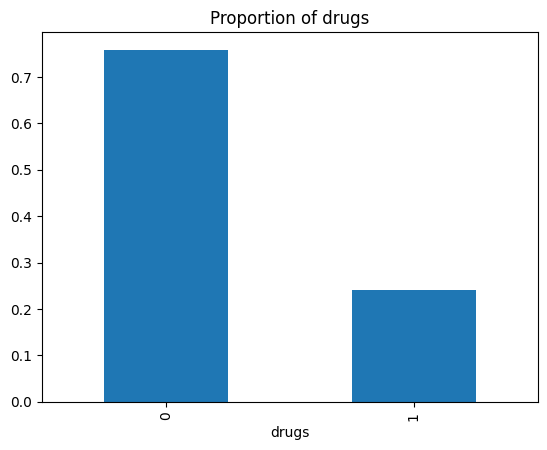

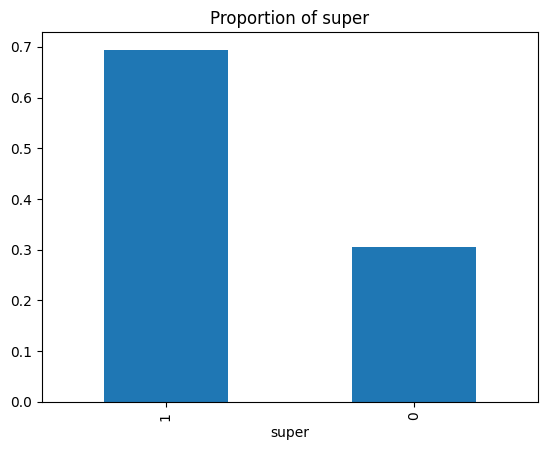

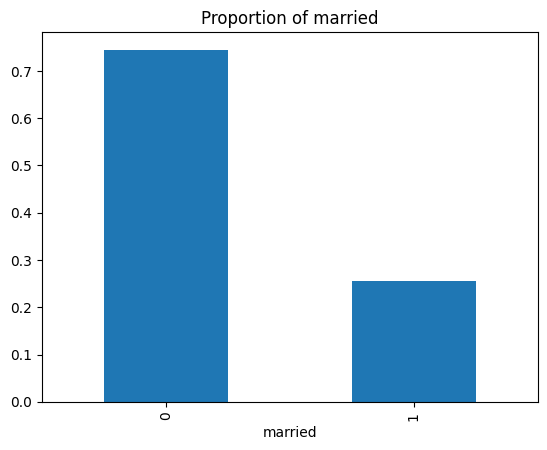

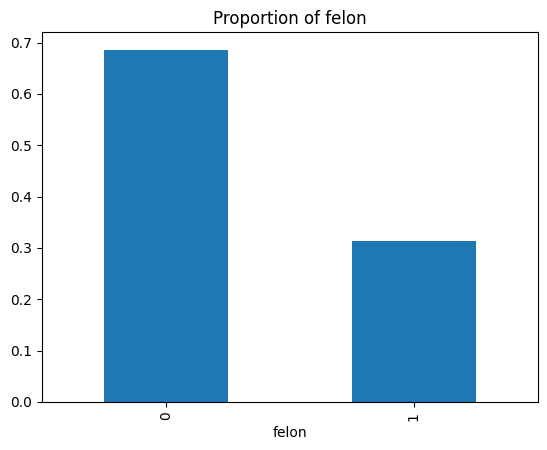

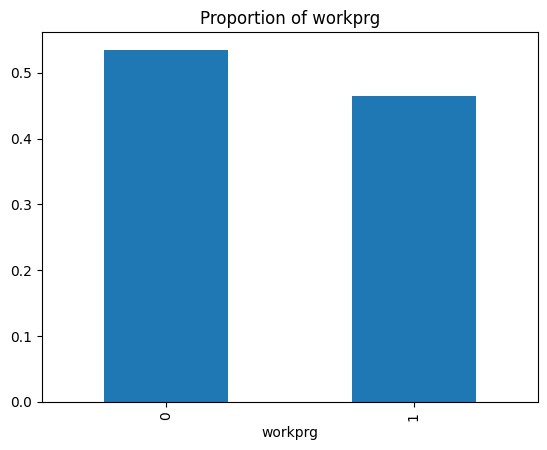

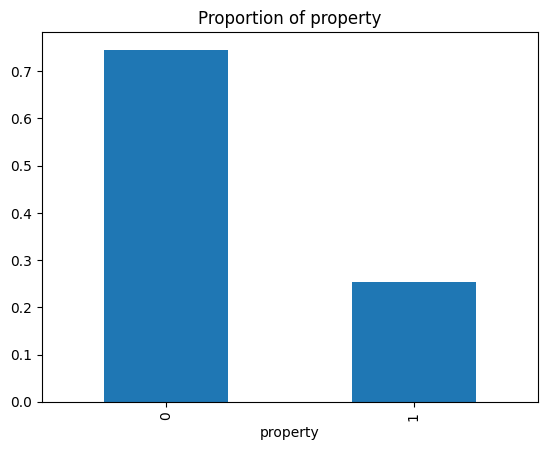

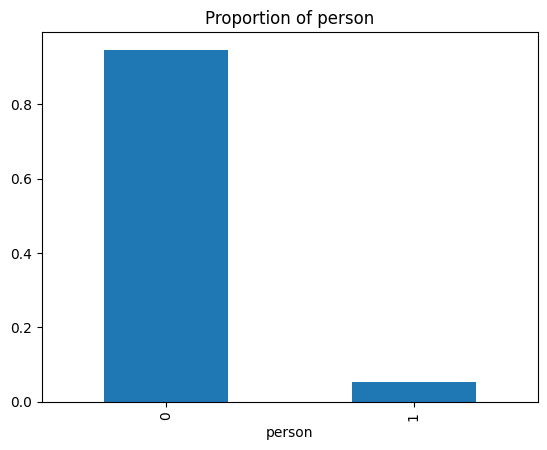

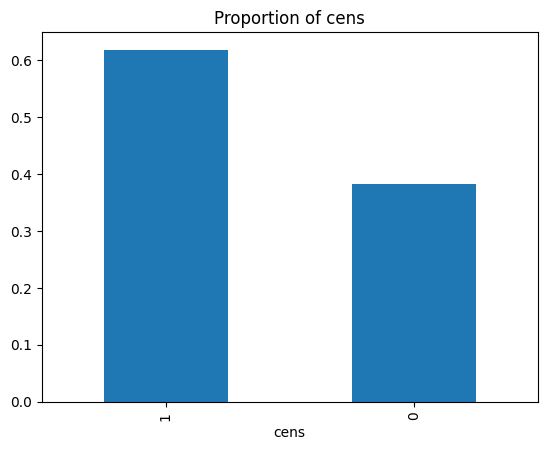

In [16]:
for col in categorical_cols:
    df[col].value_counts(normalize=True).plot(kind='bar')
    plt.title(f'Proportion of {col}')
    plt.show()

e. 1D Plotting Not Covered in Univariate Analysis

Violin plots or ECDF (Empirical CDF)  for a numerical column:

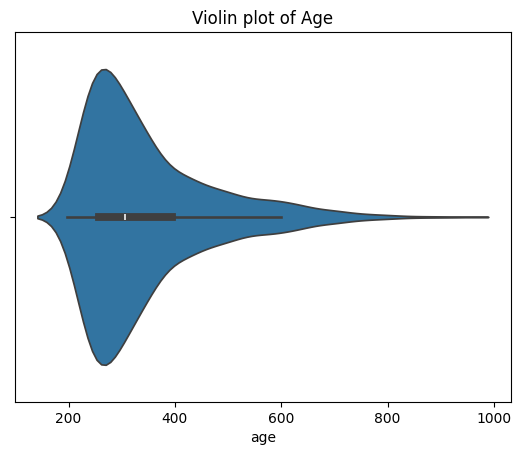

In [18]:
# Violin plot
sns.violinplot(x=df['age'])
plt.title('Violin plot of Age')
plt.show()




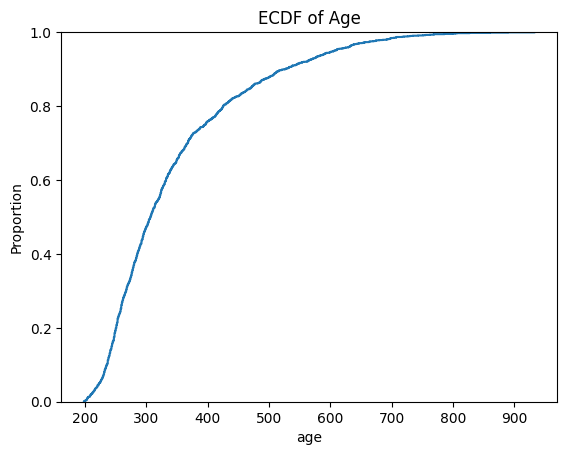

In [19]:
sns.ecdfplot(df['age'])
plt.title('ECDF of Age')
plt.show()


3. 2D (Two-Dimensional) Analysis

a. Numerical vs Numerical ( age vs tserved)

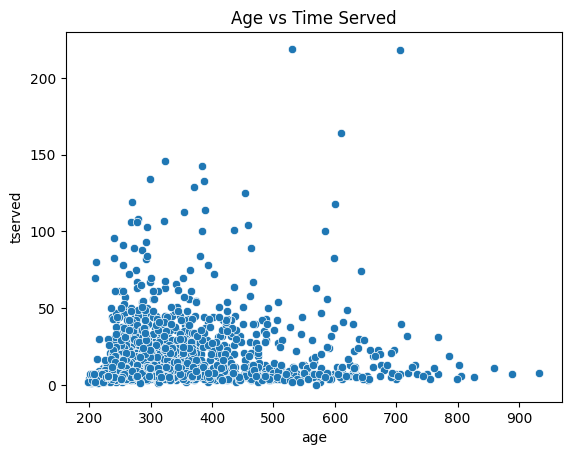

In [20]:
sns.scatterplot(x='age', y='tserved', data=df)
plt.title('Age vs Time Served')
plt.show()

b. Numerical vs Categorical (tserved by black)

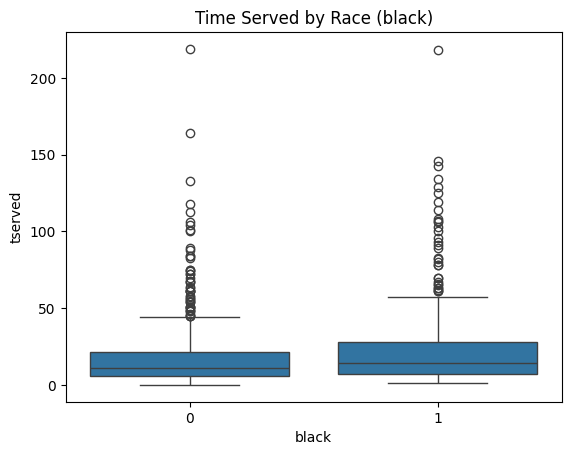

In [21]:
sns.boxplot(x='black', y='tserved', data=df)
plt.title('Time Served by Race (black)')
plt.show()

c. Categorical vs Categorical (black & felon)

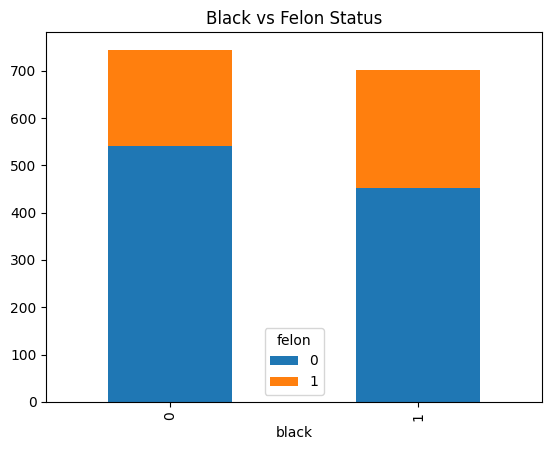

In [22]:
pd.crosstab(df['black'], df['felon']).plot(kind='bar', stacked=True)
plt.title('Black vs Felon Status')
plt.show()

4. 3D (Three-Dimensional) Analysis

a. 3D Box Plot with Seaborn (grouped boxplot)

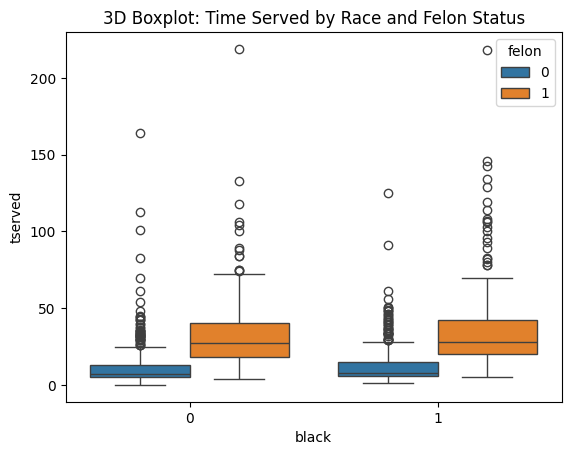

In [23]:
sns.boxplot(x='black', y='tserved', hue='felon', data=df)
plt.title('3D Boxplot: Time Served by Race and Felon Status')
plt.show()

5. Clustering :KMeans

a. Preprocessing for clustering

In [24]:
# Select features for clustering (numerical)
num_df = df.select_dtypes(include=np.number).dropna()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_df_scaled = scaler.fit_transform(num_df)

b. KMeans Clustering

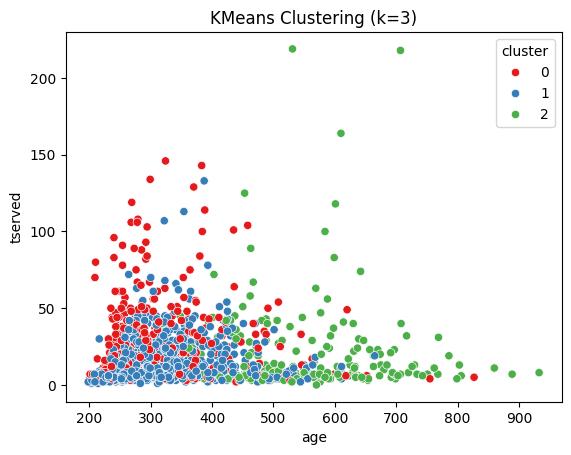

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(num_df_scaled)

# Attach labels back to the dataframe
df['cluster'] = labels

# Visualize clusters using two top features, age vs tserved
sns.scatterplot(x='age', y='tserved', hue=df['cluster'], palette='Set1', data=df)
plt.title('KMeans Clustering (k=3)')
plt.show()
